In [45]:
import pandas as pd

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error


df = pd.read_csv('~/Downloads/Auto.csv')
df = df[df['horsepower'] != '?']
df = df.sample(frac=1.)

train_len = int(len(df) * 0.8)
train = df[:train_len]
validation = df[train_len:]

train_X = train[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']]
train_y = train['mpg']

validation_X = validation[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']]
validation_y = validation['mpg']

train_aucs = []
test_aucs = []

values = np.linspace(0.1, 1, 10)

for value in values:
    model = Lasso(value)
    model.fit(train_X, train_y)
    train_preds = model.predict(train_X)
    test_preds = model.predict(validation_X)
    train_aucs.append(mean_absolute_error(train_y, train_preds))
    test_aucs.append(mean_absolute_error(validation_y, test_preds))
    print(model.coef_)

[-0.          0.00371868 -0.00531814 -0.0068867   0.          0.75111613]
[-0.          0.00343341 -0.00526136 -0.00686772  0.          0.74231003]
[-0.          0.00314816 -0.005206   -0.00684868  0.          0.73350147]
[-0.          0.0028628  -0.00515179 -0.0068296   0.          0.72469062]
[-0.          0.0025777  -0.00509711 -0.00681055  0.          0.71588134]
[-0.          0.00229298 -0.00504198 -0.00679157  0.          0.70707384]
[-0.          0.00200753 -0.00498902 -0.00677243  0.          0.69826058]
[-0.          0.00172221 -0.0049355  -0.00675332  0.          0.68944864]
[-0.          0.001437   -0.00488136 -0.00673424  0.          0.68063807]
[-0.          0.001152   -0.00482692 -0.0067152   0.          0.67182861]


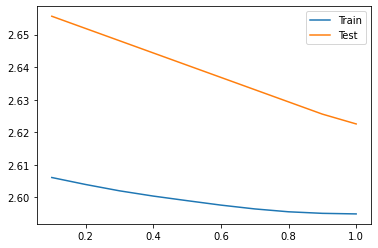

In [46]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(values, train_aucs, label='Train')
plt.plot(values, test_aucs, label='Test')
plt.legend()
plt.show()

In [40]:
print(train_aucs)

[2.5857350440681404, 2.584182855533854, 2.5824348047440835, 2.58148142195987, 2.580699713712632, 2.5801994060846853, 2.5799346958466707, 2.5800245343761947, 2.580325894267875, 2.5806273593017566]
